In [4]:
from __future__ import absolute_import

import torch
import cv2
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1

from pytorch_similarity.torch_similarity.modules import GradientCorrelation2d

In [5]:
def len_trainable_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def image_to_tensor(image, batch_size=1):

    assert(image.ndim in [2,3])

    if image.ndim == 2:
        image = np.expand_dims(image, axis=(0)) # channel

    image = np.expand_dims(image, axis=(0)) # batch
    image = np.concatenate([image]*batch_size, axis=0)

    return torch.from_numpy(image).float()


In [6]:
def test_gradient_correlation_2d(image_a, image_b, out):

    tensor_a = Variable(image_to_tensor(image_a), requires_grad=True)
    tensor_b = Variable(image_to_tensor(image_b), requires_grad=True)

    model = GradientCorrelation2d(return_map=True)
    #print(len_trainable_params(model))

    gc, gc_map = model(tensor_a, tensor_b)
    gc.backward()

    fig = plt.figure(figsize=(16,9))
    ax = plt.subplot(1,3,1)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(image_a, cmap='gray')
    fig.colorbar(im, cax=cax)
    ax.set_title('x')

    ax = plt.subplot(1,3,2)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(image_b, cmap='gray')
    fig.colorbar(im, cax=cax)
    ax.set_title('y')

    ax = plt.subplot(1,3,3)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(gc_map.data.numpy()[0,0], cmap='jet_r')
    pp = fig.colorbar(im, cax=cax)
    im.set_clim(-1e-5, 1e-5)
    ax.set_title('GC(x,y): %.4f' % gc.data.numpy())
    print('GC(x,y): %.4f' % gc.data.numpy())
    plt.tight_layout()
    plt.savefig('pytorch_similarity/test_gradient_correlation_2d_%s.png' % out)
    plt.close()


def test_zero_inputs():
    import torch
    model = GradientCorrelation2d(return_map=True)
    x = torch.zeros((1, 1, 128, 128))
    gc, gc_m = model(x, torch.zeros_like(x))
    print(gc.item())


In [7]:
image = cv2.imread('pytorch_similarity/tests/lenna.png')

test_gradient_correlation_2d(image[:,100:,0], image[:,100:,0], 'match')
test_gradient_correlation_2d(image[:,:-100,0], image[:,100:,0], 'unmatch')

test_zero_inputs()

GC(x,y): 1.0000
GC(x,y): 0.0033
1.0


In [8]:
from thermal_dataset import ThermalImageDataset as ImageDataset

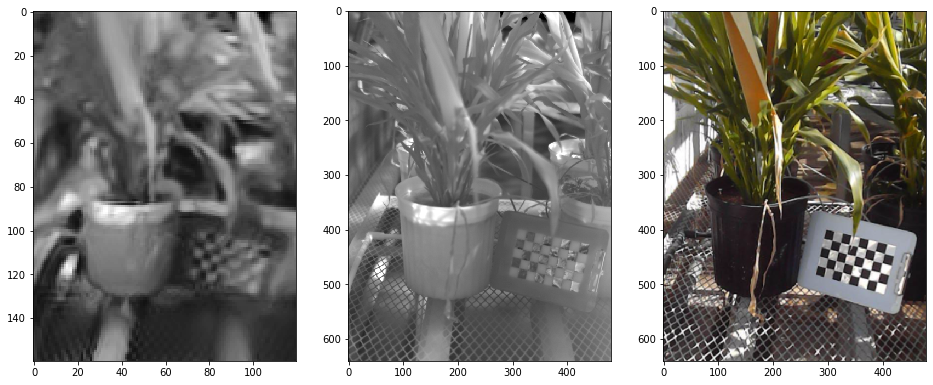

In [27]:
 # Test Image
sample_dataset = ImageDataset(dataroot="/home/lion397/data/datasets/GEMINI/Training_220315/val/",
                                image_size=96, upscale_factor=4, mode="train")
(low_img, rgb_img, high_img) = sample_dataset.getImage(10)

f, axarr = plt.subplots(1,3, figsize=(16,8))
axarr[0].imshow(low_img, interpolation='none', cmap='gray')
axarr[1].imshow(high_img, interpolation='none', cmap='gray')
axarr[2].imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB), interpolation='none')

In [15]:
low_img_640 = cv2.resize(low_img, dsize=(0,0), fx=4,fy=4)
test_gradient_correlation_2d(low_img_640, high_img, 'unmatch')

GC(x,y): 0.2041


In [2]:
from pytorch_similarity.torch_similarity.modules import LocalContrastNorm2d

def test_local_contrast_norm_2d(image):

    tensor = Variable(image_to_tensor(image), requires_grad=True)

    model = LocalContrastNorm2d()
    print(len_trainable_params(model))

    lcn = model(tensor)

    fig = plt.figure(figsize=(16,9))
    ax = plt.subplot(1,2,1)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(image, cmap='gray')
    fig.colorbar(im, cax=cax)
    ax.set_title('x')

    ax = plt.subplot(1,2,2)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(lcn.data.numpy()[0,0], cmap='gray')
    fig.colorbar(im, cax=cax)
    ax.set_title('LCN(x)')

    plt.tight_layout()
    plt.savefig('pytorch_similarity/test_local_contrast_norm_2d.png')
    plt.close()

In [9]:
test_local_contrast_norm_2d(image[:,:,0])

0


In [21]:
from pytorch_similarity.torch_similarity.modules import NormalizedCrossCorrelation
def test_normalized_cross_correlation_2d(image_a, image_b, out):

    tensor_a = Variable(image_to_tensor(image_a), requires_grad=True)
    tensor_b = Variable(image_to_tensor(image_b), requires_grad=True)

    model = NormalizedCrossCorrelation(return_map=True)
    print(len_trainable_params(model))

    gc, gc_map = model(tensor_a, tensor_b)
    #gc.backward()

    fig = plt.figure(figsize=(16,9))
    ax = plt.subplot(1,3,1)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(image_a, cmap='gray')
    fig.colorbar(im, cax=cax)
    ax.set_title('x')

    ax = plt.subplot(1,3,2)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(image_b, cmap='gray')
    fig.colorbar(im, cax=cax)
    ax.set_title('y')

    ax = plt.subplot(1,3,3)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(gc_map.data.numpy()[0,0], cmap='jet_r')
    fig.colorbar(im, cax=cax)
    im.set_clim(-1e-5, 1e-5)
    ax.set_title('NCC(x,y): %.4f' % gc.data.numpy())
    print('NCC(x,y): %.4f' % gc.data.numpy())
    plt.tight_layout()
    plt.savefig('pytorch_similarity/test_normalized_cross_correlation_2d_%s.png' % out)
    plt.close()

In [28]:
test_normalized_cross_correlation_2d(high_img, low_img_640, 'unmatch')

0
NCC(x,y): 0.7267


In [29]:
test_normalized_cross_correlation_2d(high_img, high_img, 'match')

0
NCC(x,y): 1.0000


In [30]:
from pytorch_similarity.torch_similarity.modules import GradientDifference2d
def test_gradient_difference_2d(image_a, image_b, out):

    tensor_a = Variable(image_to_tensor(image_a), requires_grad=True)
    tensor_b = Variable(image_to_tensor(image_b), requires_grad=True)

    model = GradientDifference2d(return_map=True)
    print(len_trainable_params(model))

    gc, gc_map = model(tensor_a, tensor_b)
    gc.backward()

    fig = plt.figure(figsize=(16,9))
    ax = plt.subplot(1,3,1)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(image_a, cmap='gray')
    fig.colorbar(im, cax=cax)
    ax.set_title('x')

    ax = plt.subplot(1,3,2)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(image_b, cmap='gray')
    fig.colorbar(im, cax=cax)
    ax.set_title('y')

    ax = plt.subplot(1,3,3)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cax = divider.append_axes('right', '5%', pad='3%')
    im = ax.imshow(gc_map.data.numpy()[0,0], cmap='jet')
    pp = fig.colorbar(im, cax=cax)
    im.set_clim(0, 127.5)
    ax.set_title('GD(x,y): %.4f' % gc.data.numpy())
    plt.tight_layout()
    plt.savefig('pytorch_similarity/test_gradient_difference_2d_%s.png' % out)
    plt.close()


In [32]:
test_gradient_difference_2d(image[:,100:,0], image[:,100:,0], 'match')
test_gradient_difference_2d(image[:,:-100,0], image[:,100:,0], 'unmatch')

0
0
